In [17]:
import cv2
import matplotlib.pyplot as plt
plt.style.use('default')
from skimage import feature
import numpy as np

In [11]:
image_path = "../Images/SIW/R/frame_18.png"

# DoG

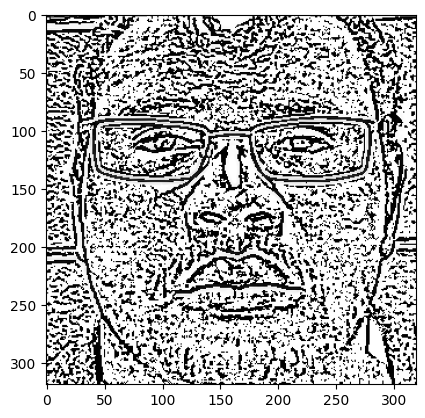

In [14]:
img = cv2.imread(image_path)
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
low_sigma = cv2.GaussianBlur(img1,(3,3),1)
high_sigma = cv2.GaussianBlur(img1,(5,5),2)

dog = low_sigma - high_sigma
plt.imshow(dog, cmap="binary")
plt.show()

# LB with histogram

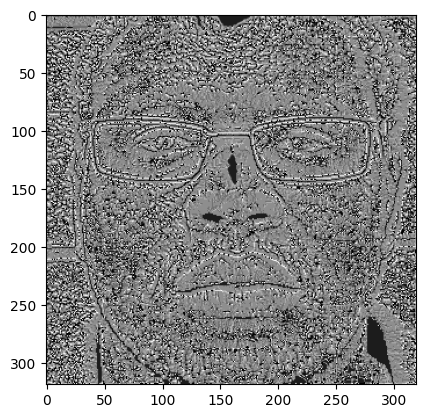

[ 0  1  2  3  4  5  6  7  8  9 10]


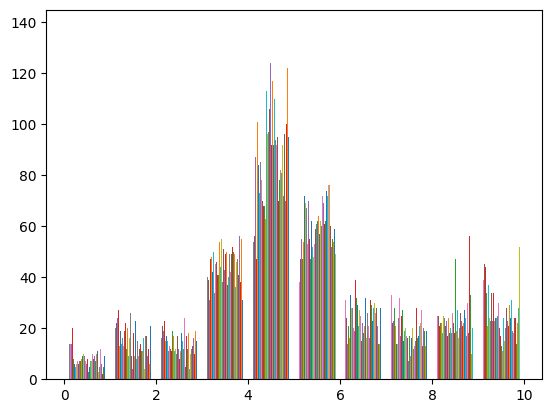

In [33]:
# https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return lbp, hist

desc = LocalBinaryPatterns(8, 1)
# desc = LocalBinaryPatterns(24, 8)

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lbp, hist = desc.describe(gray)
plt.imshow(lbp, cmap="binary")
plt.show()
print(np.arange(0, desc.numPoints + 3))
plt.hist(lbp, np.arange(0, desc.numPoints + 3))
plt.show()